# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [32]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

# shape = (500,3)
data_train  = np.genfromtxt(fname_data_train, delimiter=',')
#500
num_train = data_train.shape[0]

# shape = (500,3)
data_test   = np.genfromtxt(fname_data_test, delimiter=',')
#500
num_test = data_test.shape[0]

train_x = np.array([data_train[i][0] for i in range(num_train) ])
train_y = np.array([data_train[i][1] for i in range(num_train) ])
train_label = np.array([data_train[i][2] for i in range(num_train) ])

test_x = np.array([data_test[i][0] for i in range(num_test) ])
test_y = np.array([data_test[i][1] for i in range(num_test) ])
test_label = np.array([data_test[i][2] for i in range(num_test) ])

# train_data label
train_0_x = np.array([data_train[i][0] for i in range(num_train) if data_train[i][2] == 0.0])
train_0_y = np.array([data_train[i][1] for i in range(num_train) if data_train[i][2] == 0.0])
train_1_x = np.array([data_train[i][0] for i in range(num_train) if data_train[i][2] == 1.0])
train_1_y = np.array([data_train[i][1] for i in range(num_train) if data_train[i][2] == 1.0])
# test_data label
test_0_x = np.array([data_train[i][0] for i in range(num_train) if data_train[i][2] == 0.0])
test_0_y = np.array([data_train[i][1] for i in range(num_train) if data_train[i][2] == 0.0])
test_1_x = np.array([data_train[i][0] for i in range(num_train) if data_train[i][2] == 1.0])
test_1_y = np.array([data_train[i][1] for i in range(num_train) if data_train[i][2] == 1.0])

## plot the data

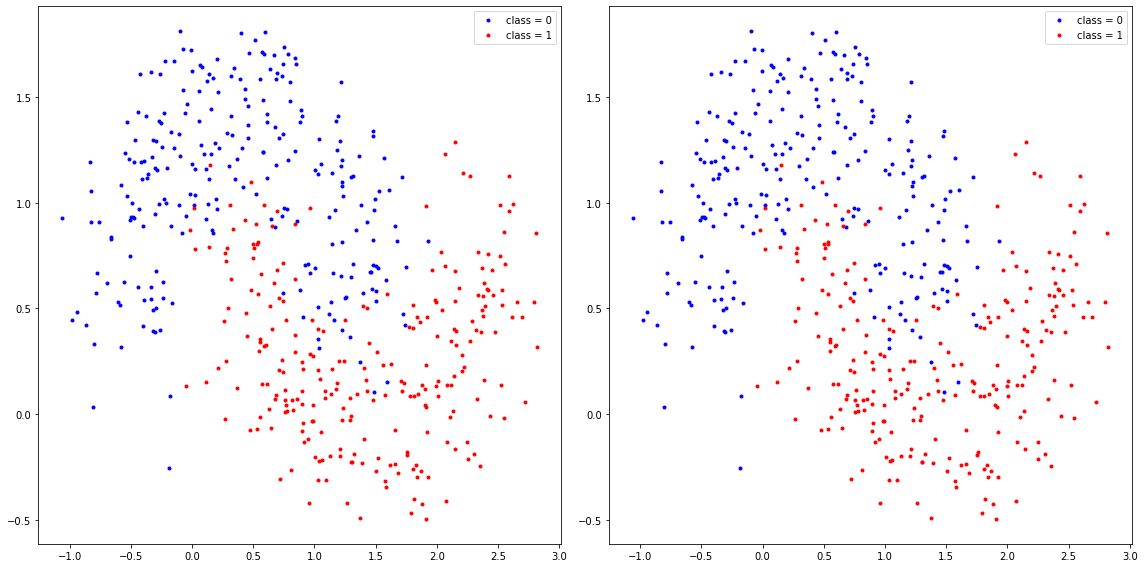

In [33]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(train_0_x,train_0_y, '.',color = 'blue', label = 'class = 0')
plt.plot(train_1_x,train_1_y, '.',color = 'red', label = 'class = 1')
plt.legend()
plt.tight_layout()


plt.subplot(122)
plt.plot(test_0_x,test_0_y, '.',color = 'blue', label = 'class = 0')
plt.plot(test_1_x,test_1_y, '.',color = 'red', label = 'class = 1')
plt.legend()
plt.tight_layout()
# 
# (x-0.34)(x-1.25) ==> x^2 -ax + b -==integral=> _x^3 -_x^2 +_x +c  
plt.show()

## define feature function

In [34]:
def feature_function(x, y):
    f0 = (x**3).reshape(500,1)
    f1 = (-(x**2)).reshape(500,1)
    f2 = (x).reshape(500,1)
    f3 = (np.ones((num_train,1))).reshape(500,1)
    f4 = (-y).reshape(500,1)
    # for regularization
    f5 = (-(x**4)).reshape(500,1)
    
    
    
    

    # (500,11) shape
    feature = np.hstack([f0,f1,f2,f3,f4,f5])
    
    return feature

## define regression function based on the feature function

In [35]:
def regression_function(theta, feature):
    
    value = np.matmul(feature, theta.reshape(theta.shape[0],1))
    # value.shape = (500,1)
    return value

## define regularization function on the model parameters

In [36]:
def regularization_function(theta):
    
    value = np.sum(theta**2)
    
    return value

## define sigmoid function

In [37]:
def logistic_function(x):
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [38]:
def compute_loss_feature(theta, feature, label, alpha):
    value = np.matmul(feature, theta.reshape(theta.shape[0],1))
    # value.shape = (500,1)
    z = 1 / (1 + np.exp(-value))
    
    loss = ( np.dot(label, np.log(np.finfo(float).eps + z)) + np.dot((1-label), np.log(np.finfo(float).eps+ 1-z)) )/np.size(label)*(-1)
    
    temp = np.sum(theta**2) *alpha / 2
    loss += temp
    
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [39]:
def compute_gradient_feature(theta, feature, label, alpha):
    value = feature @ theta.reshape(theta.shape[0],1)
    # value.shape = (500,1)
    
    #sigmoid
    value = 1 + np.exp(-value)
    z = 1/value
    # z.shape = (500,1)
    
    temp = z - label.reshape(500,1)
    temp = temp.reshape(500,)
    
    gradient_temp = np.tile(temp,(theta.shape[0],1))
    # gradient_temp.shape = (11,500)
    ff = feature.T
    #ff.shape = (11,500)
    
    gradient = (gradient_temp * ff).mean(axis = 1)
    # gradient.shape = (11,)
    reg = alpha*theta
    gradient = gradient - reg
    
    
    return gradient

## compute the accuracy

In [40]:
def compute_accuracy(theta, feature, label):
    data_num = label.shape[0]
    value = np.dot(feature, theta.reshape(np.size(theta),1))
    # value.shape = (500,1)
    
    value = 1 + np.exp(-value)
    z = 1 / value
    #z.shape = (500,1)
    
    z = z +0.5
    z = np.trunc(z)
    z = z.astype('int64')
    
    accuracy = np.sum(np.not_equal(z,label.reshape(label.shape[0],1))) / data_num
    accuracy = 1- accuracy
    return accuracy

## gradient descent for the model parameters $\theta$

In [41]:
num_iteration   = 150000
learning_rate   = 0.000001
alpha           = 0

theta = np.array([1,1,1,1,1,1000])
loss_train, loss_test = 100, 100
feature_train = feature_function(train_x, train_y)
feature_test = feature_function(test_x, test_y)
acc_train = 0.0
acc_test = 0.0



In [42]:
theta_iteration             = np.zeros((num_iteration, theta.shape[0]))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [43]:
for i in range(num_iteration):
    
    theta = theta - compute_gradient_feature(theta, feature_train, train_label, alpha)
    
    theta_iteration[i] = theta
    
    loss_train = compute_loss_feature(theta, feature_train, train_label, alpha)
    loss_test = compute_loss_feature(theta, feature_test, test_label, alpha)
    
    loss_iteration_train[i] = loss_train
    loss_iteration_test[i] = loss_test
    
    acc_train = compute_accuracy(theta,feature_train,train_label)
    acc_test = compute_accuracy(theta,feature_test,test_label)
    
    accuracy_iteration_train[i] = acc_train
    accuracy_iteration_test[i] = acc_test
    #if i%10000 == 0:
        #print("Try :",i, "loss(train) = ",loss_train, " loss(test) = ",loss_test, " accuracy(train) = ",acc_train," accuracy(test) = ",acc_test)
theta_optimal = theta

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


## compute accuracy of the classifiers

In [44]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, train_label)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, test_label)

## plot the results

In [45]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(np.arange(1,num_iteration+1), loss_iteration_train, '-', color='red',label='train')
    plt.plot(np.arange(1,num_iteration+1), loss_iteration_test,'-', color='blue',label='test')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [46]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')
    plt.plot(np.arange(1,num_iteration+1), accuracy_iteration_train, '-', color='red',label='train')
    plt.plot(np.arange(1,num_iteration+1), accuracy_iteration_test,'-', color='blue',label='test')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [47]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    plt.subplot(121)
    plt.plot(train_0_x,train_0_y, '.',color = 'blue', label = 'class = 0')
    plt.plot(train_1_x,train_1_y, '.',color = 'red', label = 'class = 1')
    plt.legend()
    plt.tight_layout()


    plt.subplot(122)
    plt.plot(test_0_x,test_0_y, '.',color = 'blue', label = 'class = 0')
    plt.plot(test_1_x,test_1_y, '.',color = 'red', label = 'class = 1')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [48]:

def plot_model_parameter(theta_iteration):
    k = theta_iteration.shape[1]
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    for j in range(k):
        plt.plot(np.arange(1,theta_iteration.shape[0]+1), theta_iteration[:,j],'-',color= 'C'+str(j), label = '$\Theta_'+str(j)+'$')
    plt.legend()
    plt.tight_layout()

    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


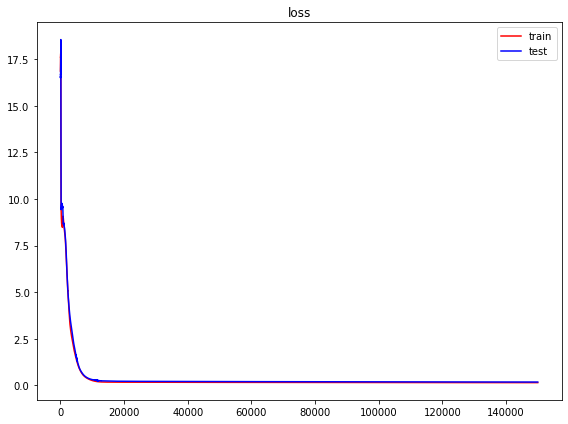

In [49]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


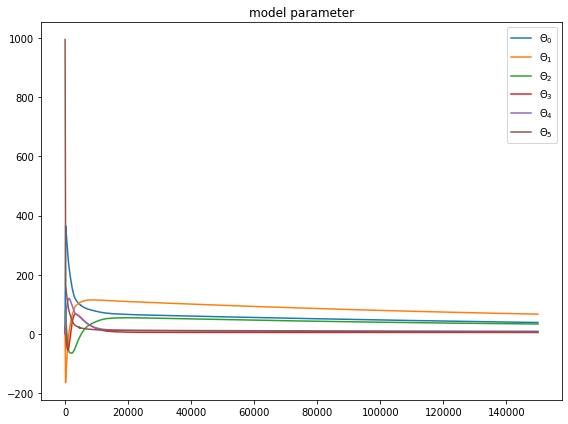

In [50]:
plot_model_parameter(theta_iteration)

In [51]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    
    xx = np.linspace(min(train_x),max(train_x), 100)
    yy = np.linspace(min(train_y), max(train_y),100)
    
    meshx,meshy = np.meshgrid(xx, yy)
    
    total = theta[0]*(meshx**3) - theta[1]*(meshx ** 2) + theta[2] *meshx - theta[4]*meshy -theta[5] * (meshx**4) + theta[3]
    meshz = logistic_function(total)
    
    plt.contourf(meshx,meshy,total, 90, cmap="RdBu_r", vmin=np.min(total), vmax=np.max(total))
    plt.colorbar()
    #plt.colorbar(total, cmap="RdBu_r",vmin = min(total), vmax = max(total))
    div = (theta[0]*(xx**3) - theta[1]*(xx ** 2) + theta[2] *xx -theta[5] * (xx**4)  + theta[3] ) / theta[4]
    
    #classifier_plot = plt.pcolormesh(meshx, meshy, meshz, cmap='RdBu_r',vmin=0,vmax=1,shading='gouraud')
    
    _0x = np.array([])
    _0y = np.array([])
    _1x = np.array([])
    _1y = np.array([])
    
    for i in range(len(data)):
        if int(data[i][2]) == 0:
            _0x = np.append(_0x, np.array([data[i][0]]))
            _0y = np.append(_0y, np.array([data[i][1]]))
        else:
            _1x = np.append(_1x, np.array([data[i][0]]))
            _1y = np.append(_1y, np.array([data[i][1]]))
    plt.title('data')
    
   
    plt.plot(_0x, _0y, 'o',color='blue',label='class = 0')
    plt.plot(_1x, _1y, 'o',color='red',label='class = 1')
    plt.plot(xx,div, '-', color='black')
    
    plt.ylim((min(train_y), max(train_y)))
    plt.legend()
    plt.tight_layout()
    plt.show()
    

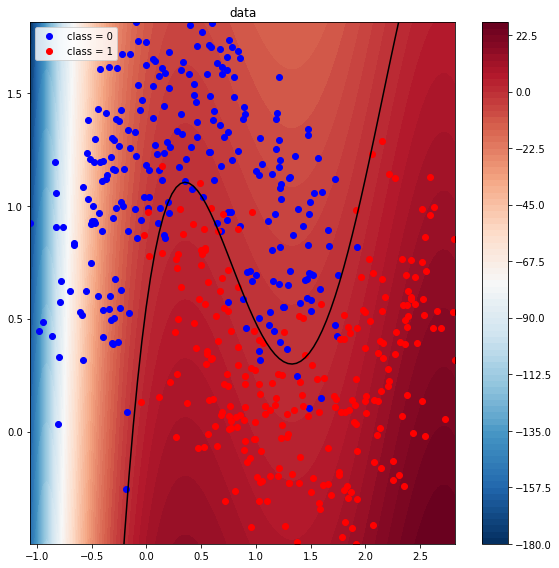

In [52]:
plot_classifier(data_train, theta_optimal)

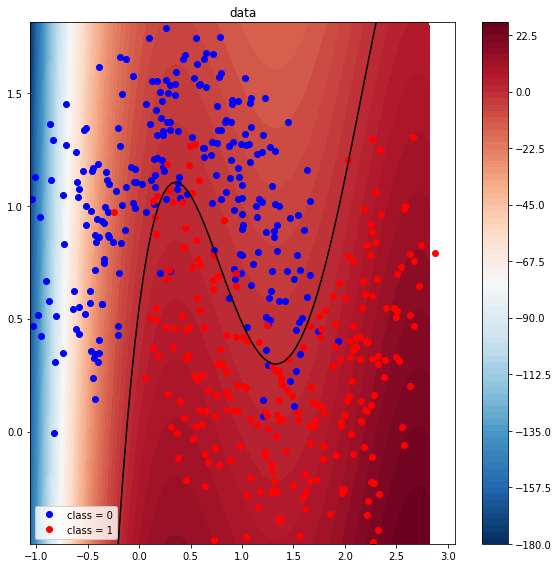

In [53]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

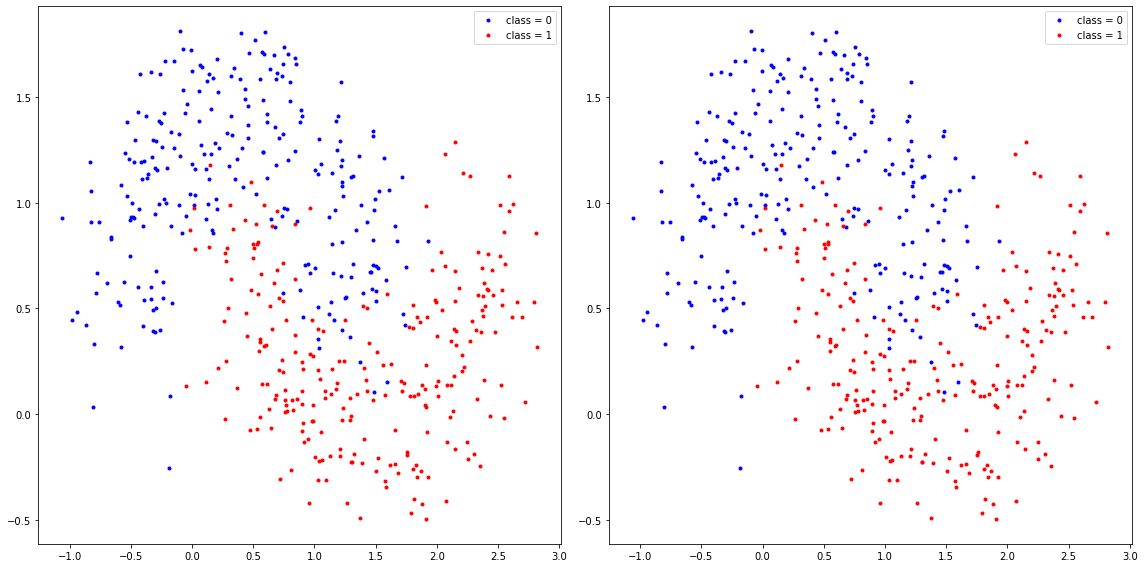

In [54]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


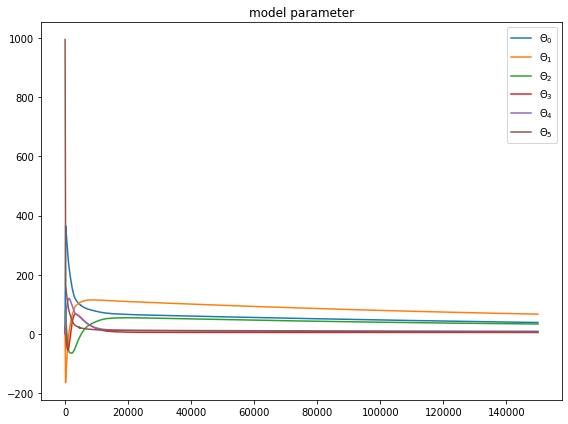

In [55]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


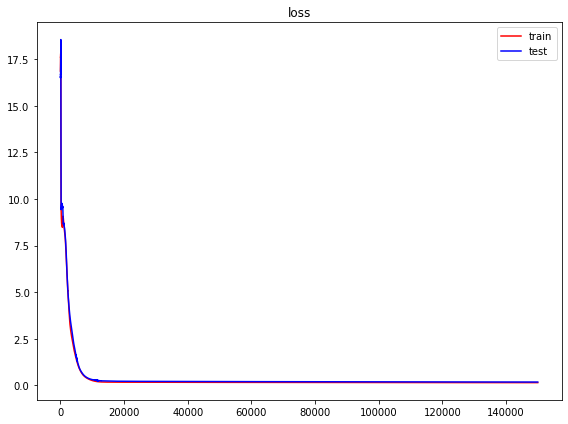

In [56]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


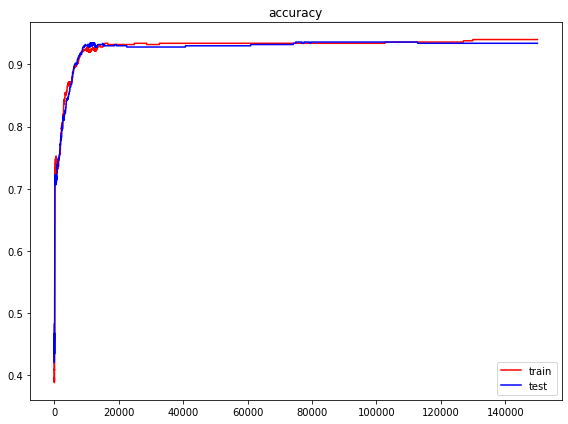

In [57]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

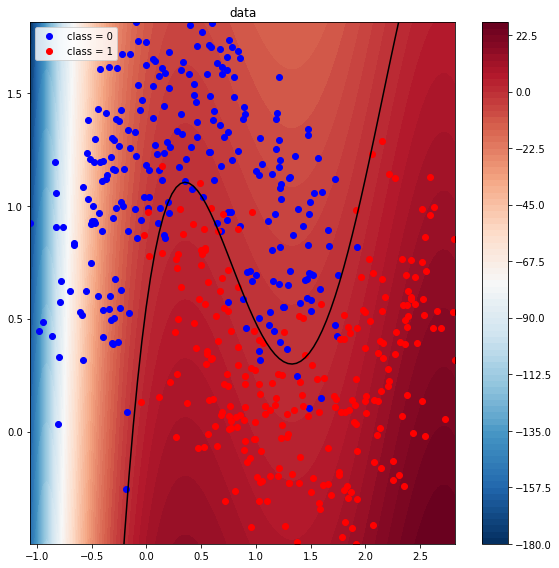

In [58]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

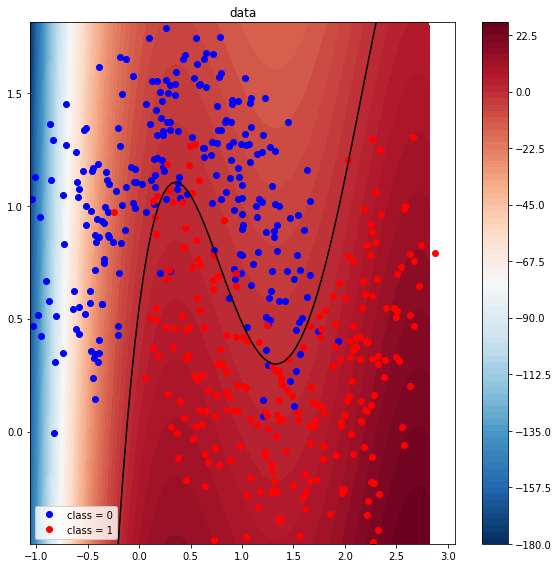

In [59]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [60]:
print('accuract(train): {0:.5f}'.format(accuracy_train))
print('accuracy(test) : {0:.5f}'.format(accuracy_test))

accuract(train): 0.94000
accuracy(test) : 0.93400
